<a href="https://colab.research.google.com/github/NiyenGreen/LE2_Lugatic_MI/blob/main/LE2_Lugatic_MI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
pip install ucimlrepo

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from ucimlrepo import fetch_ucirepo

# Load the dataset
df_heart = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                         header=None, na_values='?')
# Assign column names
df_heart.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                      'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Display the first few rows of the DataFrame
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [106]:
df_heart.loc[df_heart.duplicated()] # Look for duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [109]:
df_heart.dropna(inplace=True) # Remove missing values
df_heart.isna().sum() # Look for missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [178]:
print(df_heart.info())

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None


In [179]:
print(df_heart.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.9415

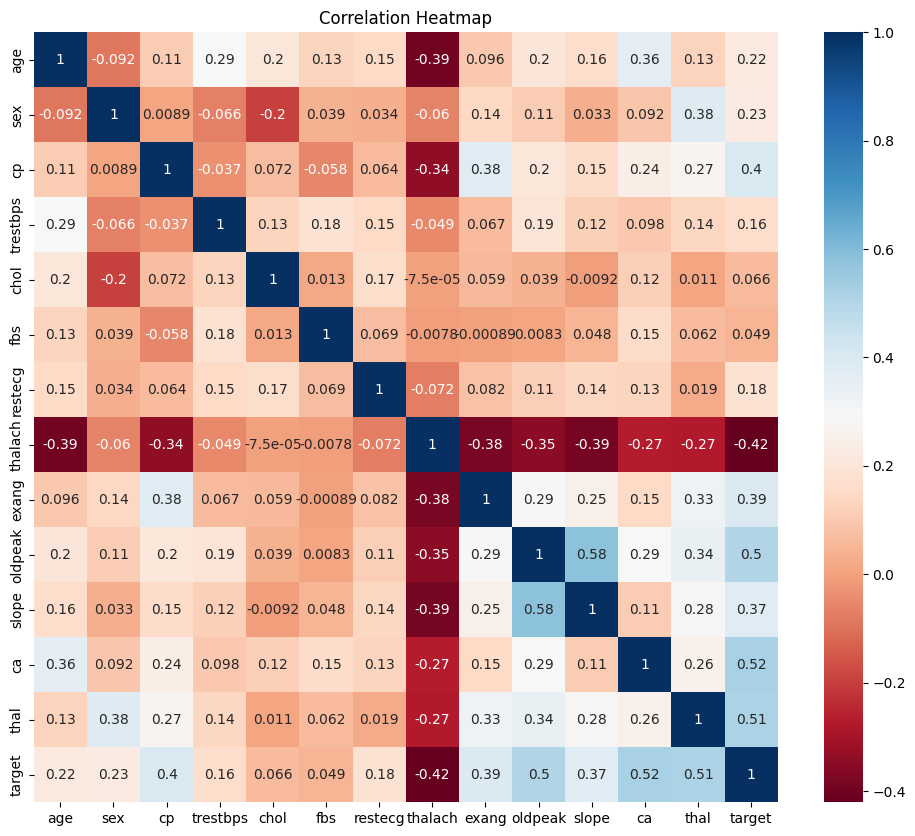

In [111]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_heart.corr(), annot=True, cmap="RdBu")
plt.title("Correlation Heatmap")
plt.show()

In [112]:
X = df_heart.drop(columns=['target'])
y = df_heart['target']

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# **SELECT BEST FEATURE**

In [113]:
from sklearn.feature_selection import SelectKBest, f_regression

sk_best = SelectKBest(score_func=f_regression, k='all')
fit = sk_best.fit(X, y)
X.columns[sk_best.get_support(indices=True)].tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

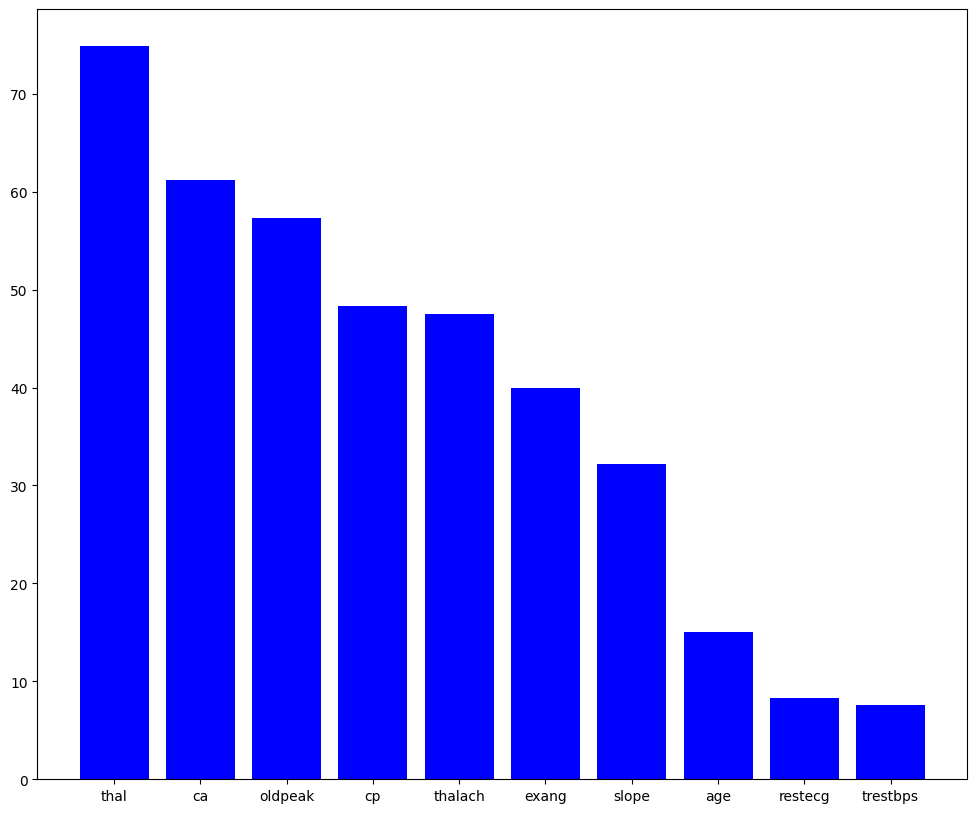

In [180]:
indices = np.argsort(fit.scores_)[::-1]

features = []
for i in range(10):
    features.append(X.columns[indices[i]])

plt.figure(figsize=(12, 10))
plt.bar(features, fit.scores_[indices[range(10)]], color='b', align='center')
plt.show()

# **CLASSIFIER METRICS**

In [172]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier

lgr = LogisticRegression(solver='lbfgs', max_iter=20000)
lgr.fit(X_train, y_train)
lgr_predictions = lgr.predict(X_test)
lgr_accuracy = accuracy_score(y_test, lgr_predictions)

svc = SVC(kernel='linear', random_state=100)
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

rnf = RandomForestClassifier()
rnf.fit(X_train, y_train)
rnf_predictions = rnf.predict(X_test)
rnf_accuracy = accuracy_score(y_test, rnf_predictions)

print("LGR Accuracy:", lgr_accuracy)
print("SVC Accuracy:", svc_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("RNF Accuracy:", rnf_accuracy)

LGR Accuracy: 0.6555555555555556
SVC Accuracy: 0.5888888888888889
KNN Accuracy: 0.5666666666666667
RNF Accuracy: 0.5666666666666667


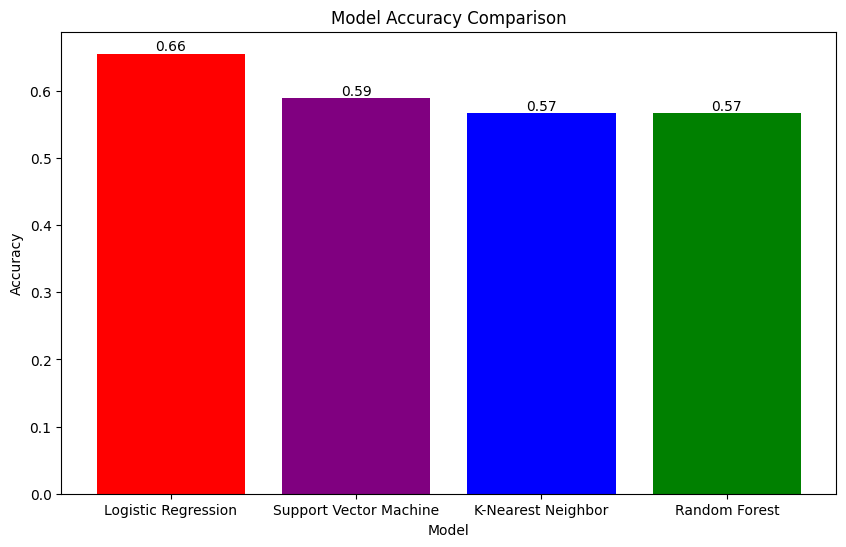

In [181]:
model_names = ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 'Random Forest']
accuracies = [lgr_accuracy, svc_accuracy, knn_accuracy, rnf_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['red', 'purple', 'blue', 'green'])

plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

In [182]:
class_models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=10000),
    "Support Vector Machine": SVC(kernel='linear', random_state=100),
    "K-Nearest Neighbor": KNeighborsClassifier(n_neighbors=11),
    "Random Forest": RandomForestClassifier()
}

all_models = {}
for name, class_model in class_models.items():
    class_model.fit(X_train, y_train)
    predictions = class_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    all_models[name] = accuracy

best_model = max(all_models.items(), key=lambda x: x[1])
best_model = class_models[best_model_name]

print("Best Model:", best_model_name)
print("Accuracy:", best_model_accuracy)

Best Model: Logistic Regression
Accuracy: 0.6555555555555556


# **ENSEMBLE**

In [183]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

adabooster_classifier = AdaBoostClassifier(best_model, n_estimators=50,
                                           learning_rate=1.0, random_state=42)
adabooster_classifier.fit(X_train, y_train)
ada_predictions = adabooster_classifier.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)

print("AdaBoost Accuracy:", ada_accuracy)

AdaBoost Accuracy: 0.6
